In [1]:
# install pandas
%pip install pandas
%pip install numpy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# session 1 - 07.05.25 participants Hannah, Lena, Paula, Katharina
# 1 Data set selection 

import pandas as pd

# load data frame
df = pd.read_csv(r"alzheimerdata_with_missing_valuesv2.csv")

# get overview 
df.head()
df.info()

# number of columns and rows
df.shape
# we have 2149 rows and 35 columns

# culumn names
df.columns

# why did we choose this data frame?
# Information about the data set
# This dataset contains extensive health information for 2,149 patients, each uniquely identified with IDs ranging from 4751 to 6900. 
# The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, cognitive and 
# functional assessments, symptoms, and a diagnosis of Alzheimer's Disease. The data is ideal for researchers and data 
# scientists looking to explore factors associated with Alzheimer's, develop predictive models, and conduct statistical analyses.

# contains numerical (AlcoholConsumption, PhysicalActivity, SleepQuality,...); categorical data (Gender, Ethnicity, EducationLevel, Smoking,...)
# includes more than 10 input variablen -> 34
# clearly defined target variable: Diagnosis (0 = no Alzheimer; 1 = Alzheimer)
# sufficient size -> 2149 rows
# complexity: medical, demographical and cognitive data

# suitability: cleary defined binary target variable; sufficient input variables (features), sufficient size

#drop unnecessary columns
unnecessary_columns=['PatientID','DoctorInCharge']
df = df.drop(columns=unnecessary_columns)
df.head()

#now our dataset has 33 columns left instead of 35

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        1620 non-null   float64
 2   Gender                     1955 non-null   float64
 3   Ethnicity                  1777 non-null   float64
 4   EducationLevel             1627 non-null   float64
 5   BMI                        1699 non-null   float64
 6   Smoking                    1569 non-null   float64
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           1678 non-null   float64
 9   DietQuality                1565 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    1911 non-null   float64
 12  CardiovascularDisease      1494 non-null   float64
 13  Diabetes                   1759 non-null   float

Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0  73.0     0.0        0.0             2.0        NaN      0.0   
1  89.0     0.0        0.0             0.0        NaN      0.0   
2  73.0     NaN        3.0             1.0  17.795882      NaN   
3   NaN     1.0        0.0             NaN        NaN      1.0   
4  89.0     NaN        0.0             0.0  20.716974      NaN   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0           13.297218          6.327112     1.347214      9.025679  ...   
1            4.542524          7.619885          NaN      7.151293  ...   
2           19.555085          7.844988          NaN      9.673574  ...   
3           12.209266          8.428001     7.435604      8.392554  ...   
4           18.454356          6.310461     0.795498      5.597238  ...   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0              6.518877               0.0                 0.0  1.725883   
1              7.118696               0.0                 0.0  2.592424   
2              5.895077               0.0                 0.0  7.119548   
3              8.965106               0.0                 1.0  6.481226   
4              6.045039               0.0                 NaN  0.014691   

   Confusion  Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0        0.0             NaN                 0.0                        1.0   
1        0.0             0.0                 0.0                        0.0   
2        0.0             1.0                 0.0                        1.0   
3        0.0             0.0                 0.0                        0.0   
4        0.0             0.0                 1.0                        1.0   

   Forgetfulness  Diagnosis  
0            0.0          0  
1            1.0          0  
2            0.0          0  
3            0.0          0  
4            NaN          0  

[5 rows x 33 columns]

In [3]:
# limitations:
# missing values?
print(df.isnull().values.sum())
# we have 9231 missing values

# ethical considerations
# sensitive data including phyical and medical health indicators - e.g. Alzheimer, Ethnicity, Depression 

# potential bias possible in ethnicity as the mayority is caucasian 
# Also distribution in just 4 ethnicity groups shows possible limitation of the data
# gender seems to be equally distributed


# Check demografic variables
gender_distribution = df['Gender'].value_counts()
age_distribution = df['Age'].describe()  # Geben Sie eine Zusammenfassung des Alters

# check for bias
print("Geschlechterverteilung:\n", gender_distribution)
print("\nAltersverteilung:\n", age_distribution)

9231
Geschlechterverteilung:
 Gender
1.0    987
0.0    968
Name: count, dtype: int64

Altersverteilung:
 count    1620.000000
mean       74.995062
std         8.915774
min        60.000000
25%        68.000000
50%        75.000000
75%        83.000000
max        90.000000
Name: Age, dtype: float64


In [4]:
# Task 2 EDA (participants: Lena, Hannah, Paula, Katharina date: 14.05.25)

# statistics of data
# print(df.dtypes)
column_numerical = ['Age', 'BMI', "AlcoholConsumption", "PhysicalActivity", "DietQuality", "SleepQuality", "SystolicBP", "DiastolicBP", "CholesterolTotal", "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides", "MMSE", "FunctionalAssessment", "ADL"]
# df[column_numerical].mean()

statistic_df = pd.DataFrame({
    'Mittelwert': df[column_numerical].mean(),
    'Median': df[column_numerical].median(),
    'SD': df[column_numerical].std()
})

print(statistic_df)

# missingness rates
# count missing values in df
print(df.isnull().values.sum())

# Check across each column
df.isnull().any()

# Check if missing values in each column
df.isna().sum().sort_values(ascending=False)


                          Mittelwert      Median          SD
Age                        74.995062   75.000000    8.915774
BMI                        27.733405   27.860727    7.214591
AlcoholConsumption         10.039442    9.934412    5.757910
PhysicalActivity            4.910309    4.719842    2.860746
DietQuality                 4.927170    5.041911    2.903059
SleepQuality                7.051081    7.115646    1.763573
SystolicBP                134.419463  134.000000   25.924498
DiastolicBP                89.810432   90.000000   17.514335
CholesterolTotal          225.197519  225.086430   42.542233
CholesterolLDL            124.213688  123.164962   43.383385
CholesterolHDL             59.393013   59.820570   23.198110
CholesterolTriglycerides  228.281496  230.301983  101.986721
MMSE                       14.757445   14.469000    8.613452
FunctionalAssessment        5.079990    5.034020    2.889747
ADL                         4.982814    5.023334    2.932299
9231


Depression                   691
CardiovascularDisease        655
BehavioralProblems           625
DietQuality                  584
Smoking                      580
HeadInjury                   552
Age                          529
EducationLevel               522
PhysicalActivity             471
BMI                          450
FunctionalAssessment         425
Disorientation               409
Diabetes                     390
Ethnicity                    372
DiastolicBP                  366
FamilyHistoryAlzheimers      238
CholesterolHDL               223
ADL                          213
Gender                       194
PersonalityChanges           172
Forgetfulness                154
CholesterolLDL               130
Hypertension                  77
MMSE                          68
SystolicBP                    63
DifficultyCompletingTasks     43
MemoryComplaints              35
CholesterolTriglycerides       0
Confusion                      0
CholesterolTotal               0
SleepQuali

In [5]:
%pip install missingno==0.5.2
import missingno as msno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

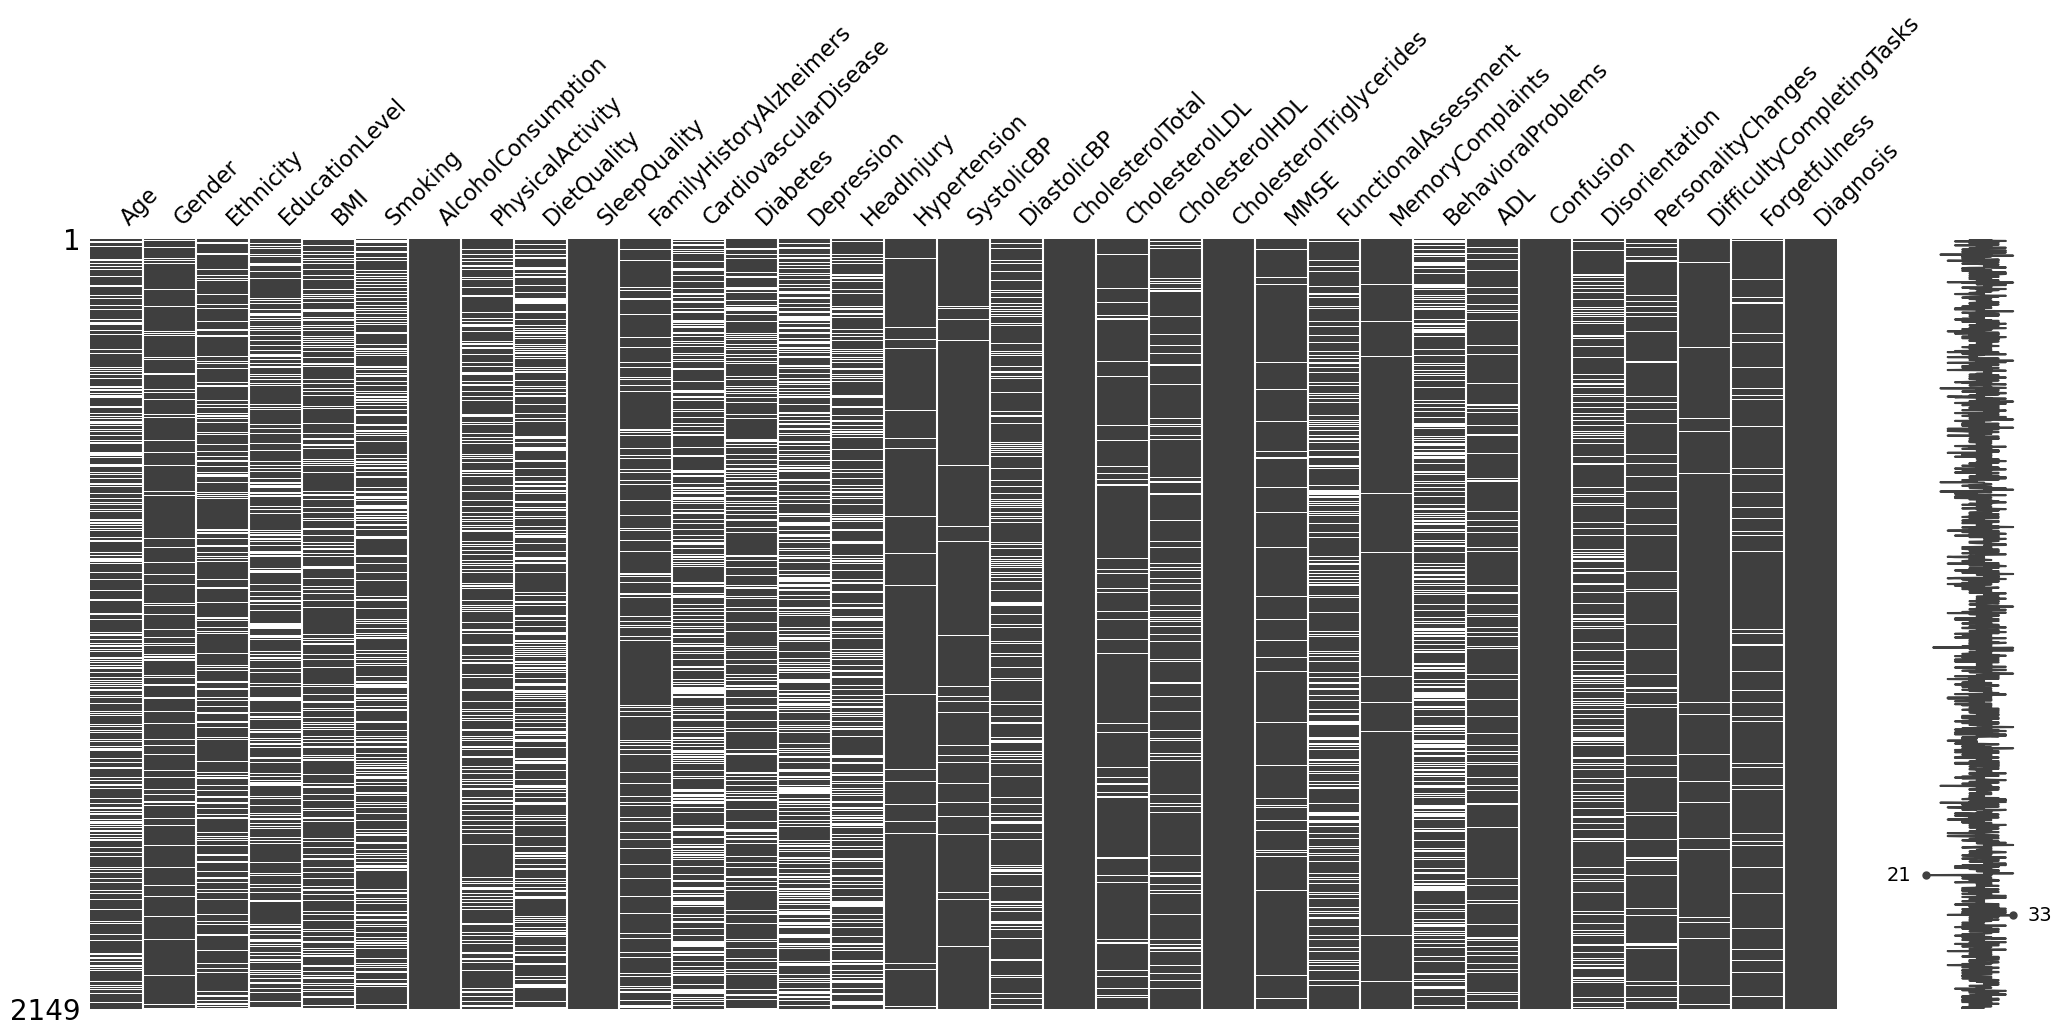

In [6]:
#Visualize missing values as a matrix
msno.matrix(df)



<Axes: >

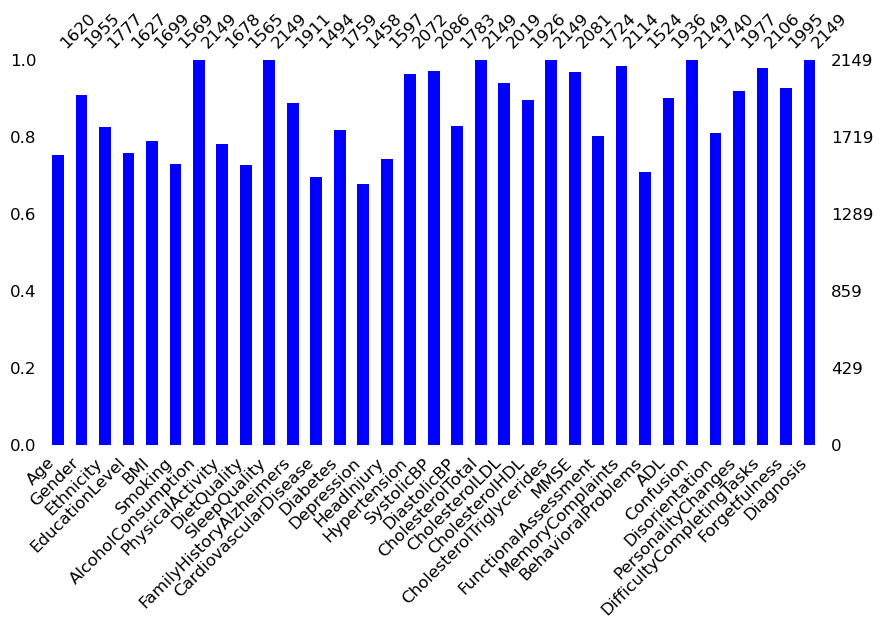

In [7]:
#Visualize missing values as a bar
msno.bar(df, figsize=(10, 5), fontsize=12,
color='blue')

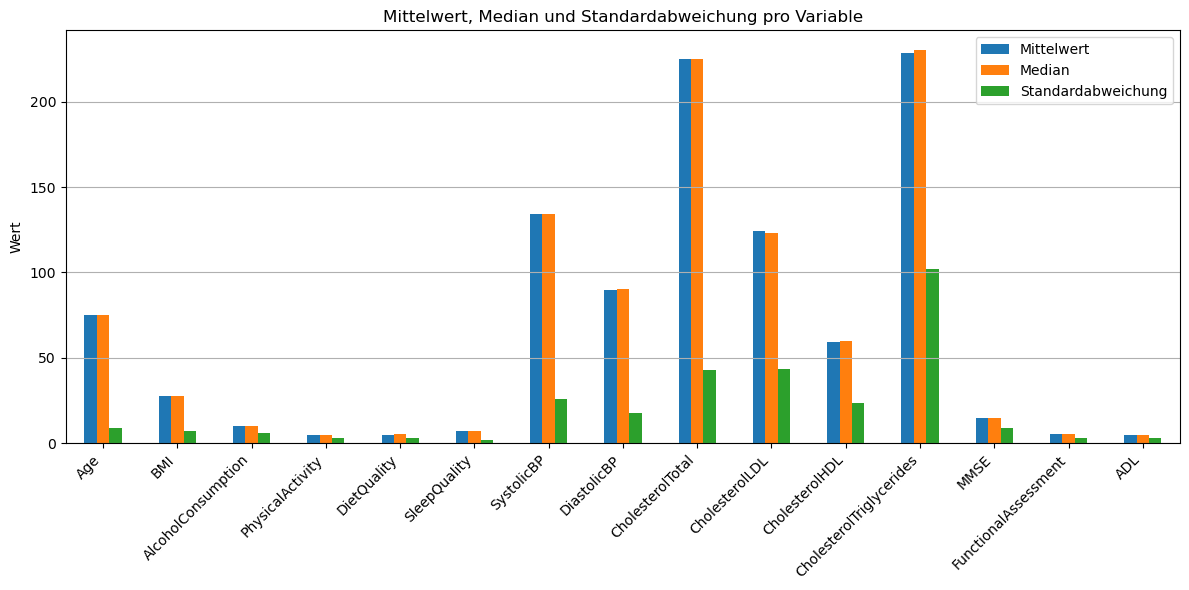

In [8]:
# Statistiken berechnen
means = df[column_numerical].mean()
medians = df[column_numerical].median()
stds = df[column_numerical].std()

# Kombinieren in ein DataFrame für die Visualisierung
stat_df = pd.DataFrame({
    'Mittelwert': means,
    'Median': medians,
    'Standardabweichung': stds
})

# Plotten
stat_df.plot(kind='bar', figsize=(12, 6))
plt.title('Mittelwert, Median und Standardabweichung pro Variable')
plt.ylabel('Wert')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [9]:
%pip install seaborn
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


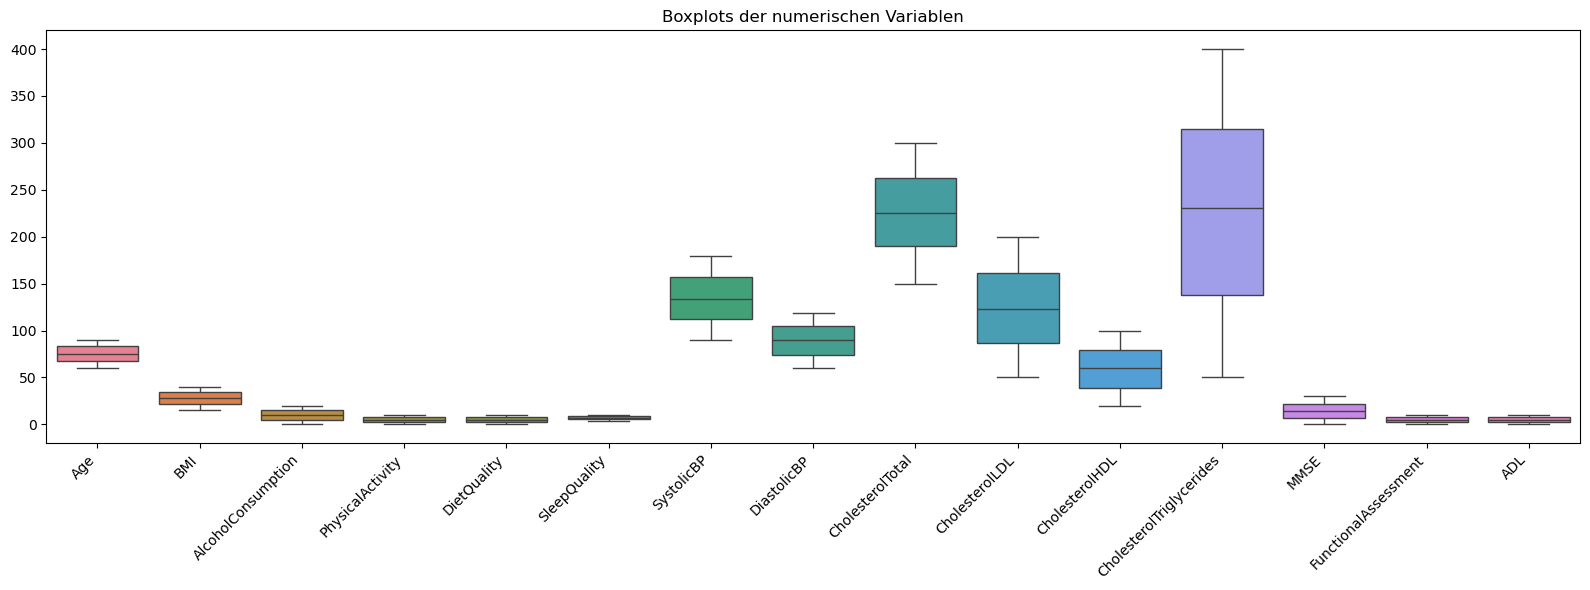

In [10]:
# visualize mean median sd in boxplots
# sns.boxplot(df[column_numerical]) # but we want it nicer

# set figure size
plt.figure(figsize=(16, 6)) 

sns.boxplot(data=df[column_numerical])

# make it nice
plt.xticks(rotation=45, ha='right')  # turns y values
plt.title('Boxplots der numerischen Variablen')
plt.tight_layout()
plt.show()

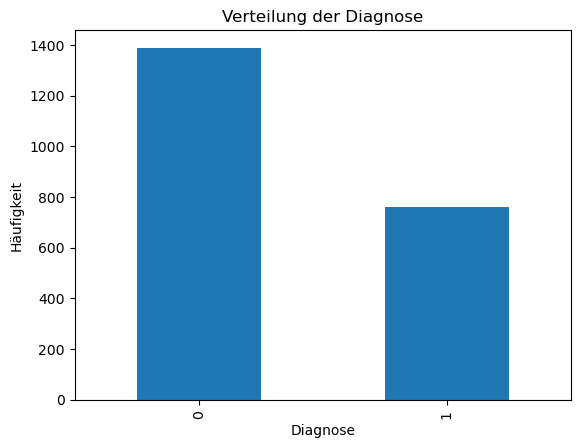

1389
760


In [11]:
# Analysis of the target variable
# --> Class distribution because target value is 0 or 1 (with or without alzheimer)

# show distribution of target variable alzheimer
df['Diagnosis'].value_counts().plot(kind='bar')
plt.title('Verteilung der Diagnose')
plt.xlabel('Diagnose')
plt.ylabel('Häufigkeit')
plt.show()
# more without alzheimer than with

# count how many people with and without alzheimer (Diagnosis == 0 / Diagnosis == 1)
print(df[df['Diagnosis'] == 0].shape[0])
print(df[df['Diagnosis'] == 1].shape[0])
# there is more without alzheimer: 951 than with: 531
# there is a clear class imbalance
# this imbalance can negatively affect classification performance, particularly if a model learns to overpredict the 
# majority class (e.g., always guessing "no Alzheimer" to boost accuracy).

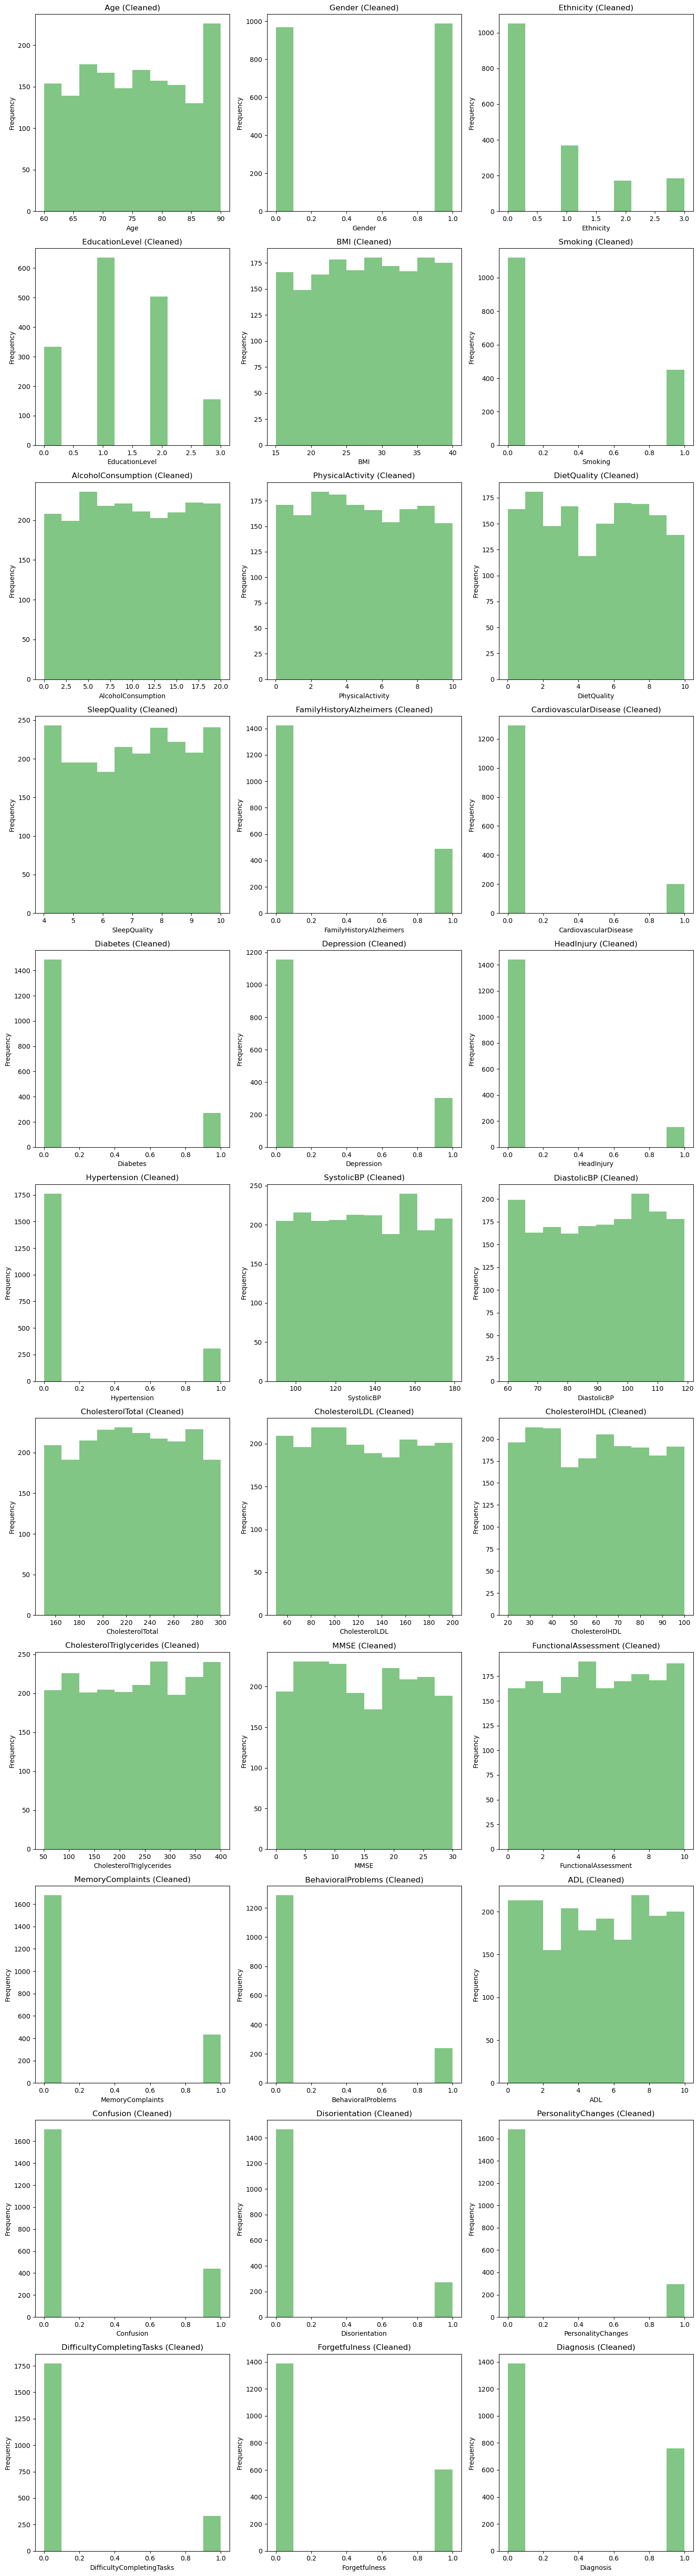

In [12]:
# outliers

# Get the Descriptive Statistics
df.describe()
df["SystolicBP"].describe()

# no inplausible values found

# Load Library
import math
import matplotlib.pyplot as plt
import seaborn as sns
# Set up Plotting
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
n = len(numerical_columns)
nrows = math.ceil(n / 3)
# Histograms
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5 * nrows))
axes = axes.flatten()

# Load Library
for i, column in enumerate(numerical_columns):
    axes[i].hist(df[column].dropna(), bins=10, alpha=0.7, color="#4CAF50")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f"{column} (Cleaned)")
for i in range(len(numerical_columns), len(axes)):
    axes[i].axis('off')
plt.tight_layout()
plt.show()

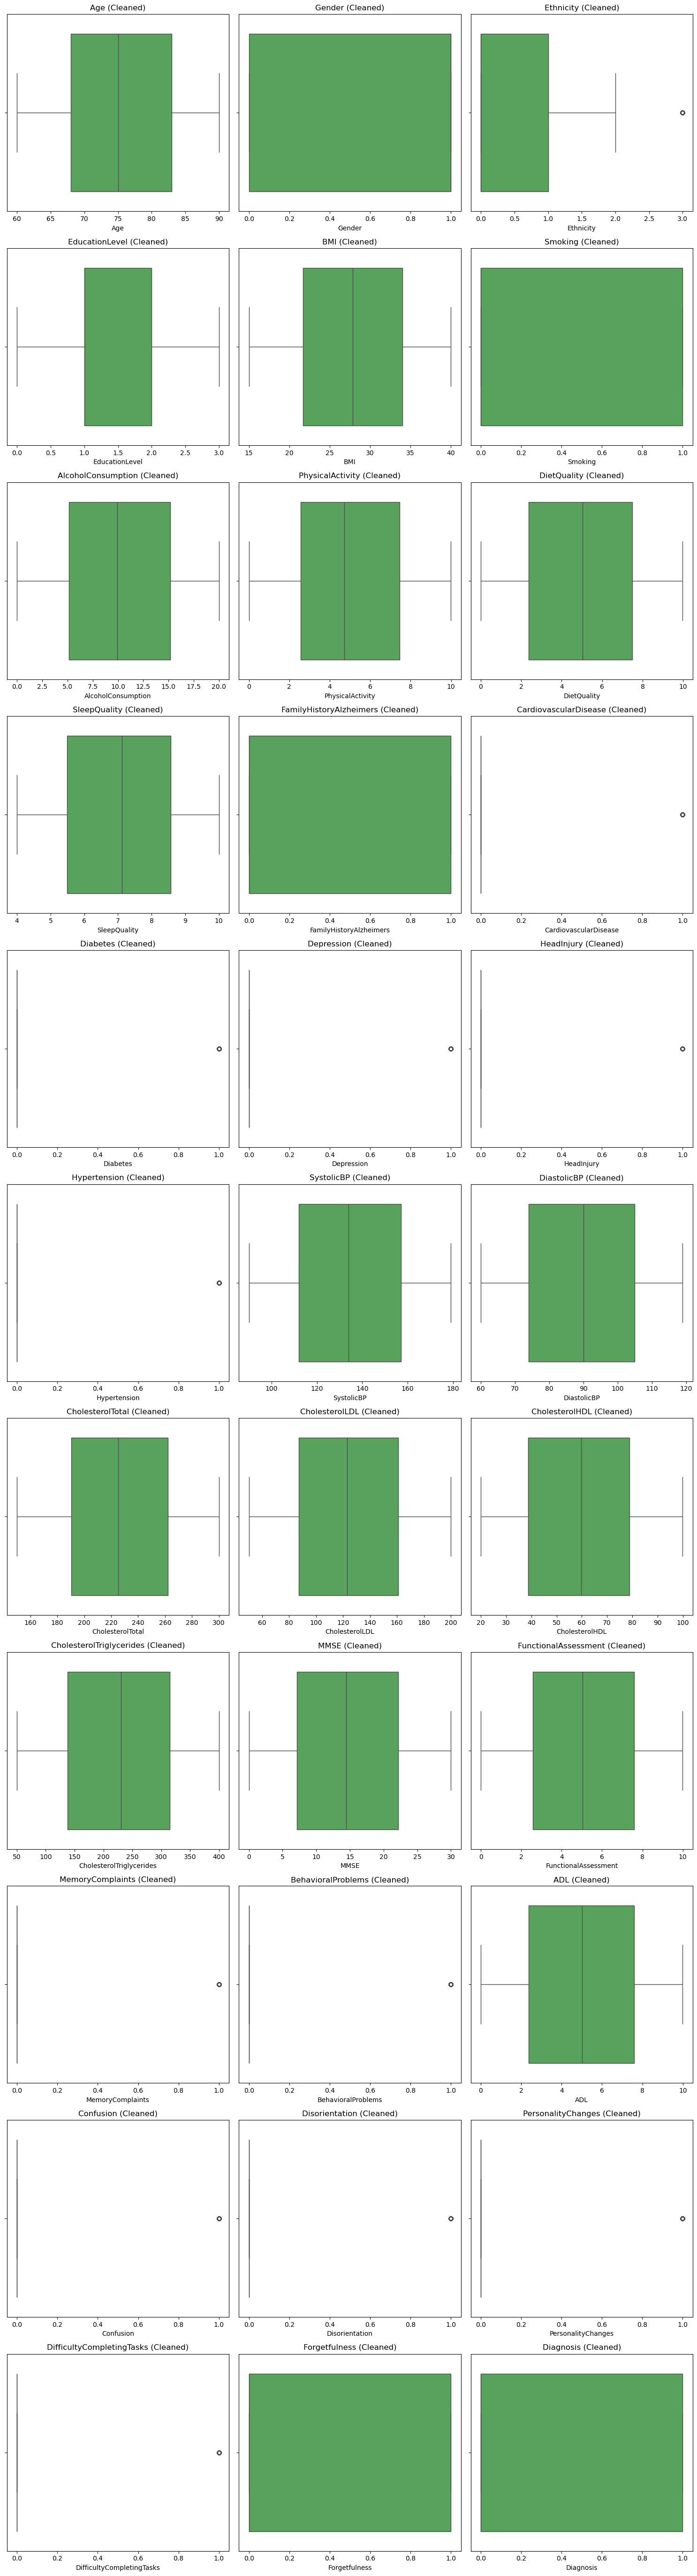

In [13]:
# Boxplots
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5 * nrows))
axes = axes.flatten()
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[i], orient='h', color="#4CAF50")
    axes[i].set_title(f"{column} (Cleaned)")
for i in range(len(numerical_columns), len(axes)):
    axes[i].axis('off')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

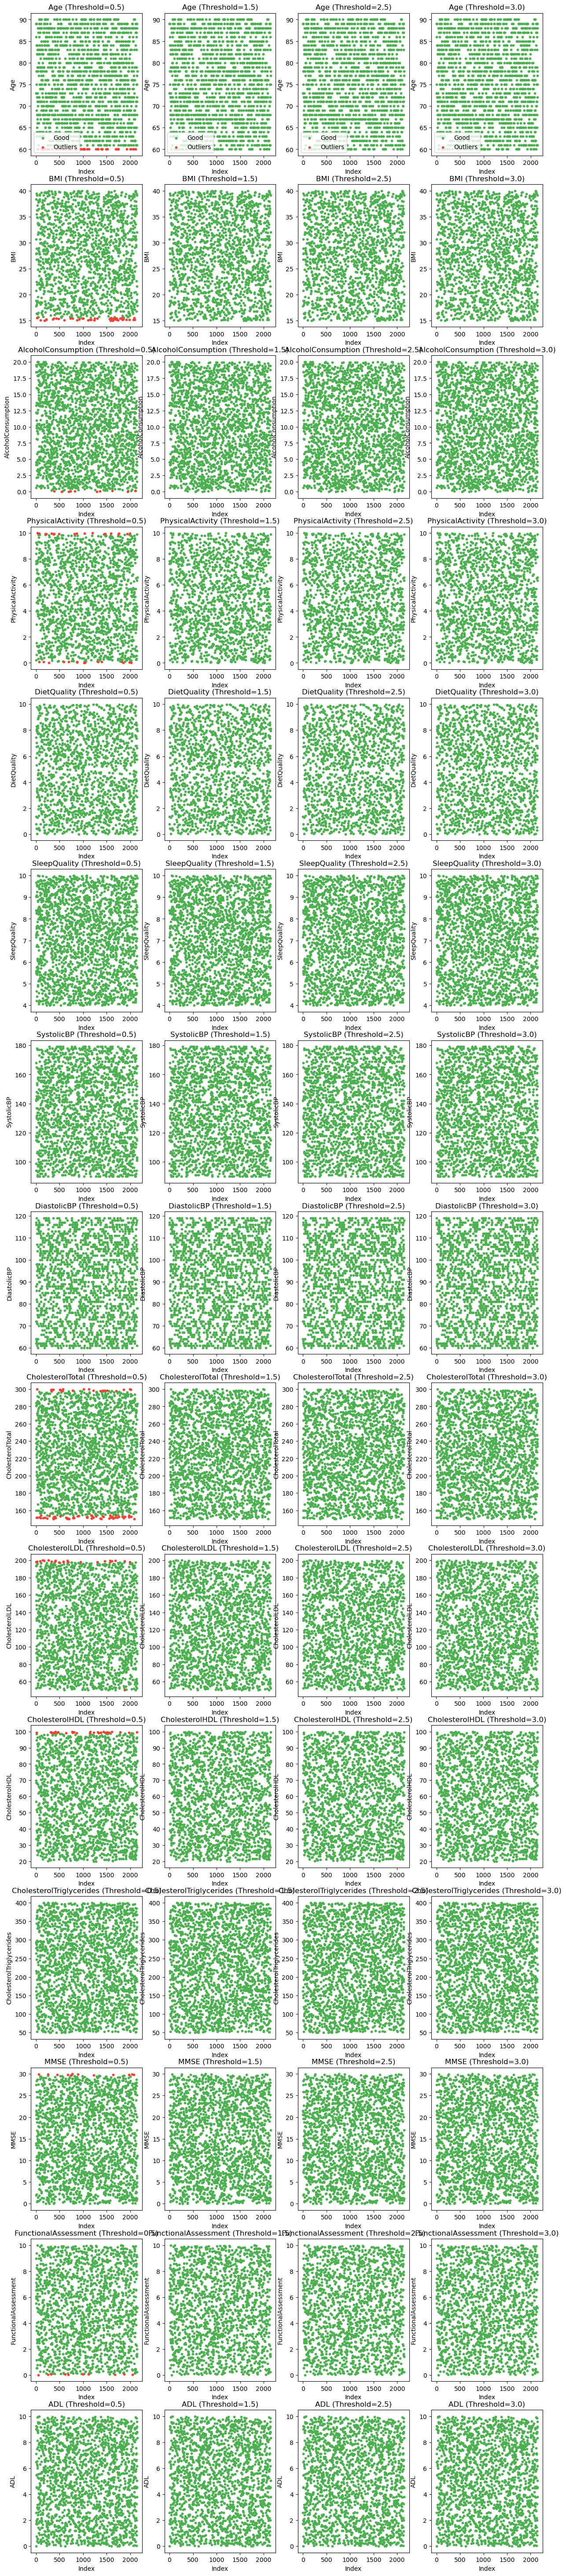

In [14]:
# # Specify columns to check for outliers
columns_to_check = column_numerical
# Create a function to calculate IQR-based outliers
def iqr_outliers(series, threshold=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)
    return (series < lower_bound) | (series > upper_bound)

# Function to visualize outliers at different thresholds
def visualize_iqr_thresholds(df, columns, thresholds):
    plt.figure(figsize=(15, len(columns) * 5))
    for i, column in enumerate(columns, 1):
        for j, threshold in enumerate(thresholds, 1):
            plt.subplot(len(columns), len(thresholds), (i - 1) * len(thresholds) + j)
            outliers = iqr_outliers(df[column], threshold=threshold)    
            plt.scatter(df.index[~outliers], df[column][~outliers], s=10, label="Good", color="#4CAF50")
            plt.scatter(df.index[outliers], df[column][outliers], s=10, label="Outliers", color="#F44336")
            plt.title(f"{column} (Threshold={threshold})")
            plt.xlabel("Index")
            plt.ylabel(column)
            if i == 1:
                plt.legend()
plt.tight_layout()
plt.show()

# Define thresholds to visualize
iqr_thresholds = [0.5, 1.5, 2.5, 3.0]
# Visualize outliers at different thresholds
visualize_iqr_thresholds(df, columns_to_check , iqr_thresholds)

#our scatterplots show that we do not have any significant outliers in any numerical variable
#this is why we decided to keep all the data without removing any outliers

In [15]:
#column-wise deletion
# we want to see if there are any columns with too much missing data

# Calculate the percentage of missing values for each column
missing_percentage = df.isna().mean() * 100
# Sort the missing percentage in descending order
sorted_missing_percentage = missing_percentage.sort_values(ascending=False)
# Print the percentage of missing values
print("Percentage of missing values for each column:")
print(missing_percentage)

# CardiovascularDisease and Depression have more than 30% missing values so we dont want to touch those.

Percentage of missing values for each column:
Age                          24.616101
Gender                        9.027455
Ethnicity                    17.310377
EducationLevel               24.290368
BMI                          20.939972
Smoking                      26.989297
AlcoholConsumption            0.000000
PhysicalActivity             21.917171
DietQuality                  27.175430
SleepQuality                  0.000000
FamilyHistoryAlzheimers      11.074919
CardiovascularDisease        30.479293
Diabetes                     18.147976
Depression                   32.154490
HeadInjury                   25.686366
Hypertension                  3.583062
SystolicBP                    2.931596
DiastolicBP                  17.031177
CholesterolTotal              0.000000
CholesterolLDL                6.049325
CholesterolHDL               10.376919
CholesterolTriglycerides      0.000000
MMSE                          3.164262
FunctionalAssessment         19.776640
MemoryComplaints  

In [16]:
# missing values treatment
# MICE

# need to enable iterative imputer explicitly since its still experimental
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#tried to do MICE for categorial columns, but it did not work 
#df_your_cat_column = ['Diagnosis','Forgetfulness','DifficultyCompletingTasks','PersonalityChanges','Disorientation','Confusion','BehavioralProblems','MemoryComplaints','Hypertension','HeadInjury','Depression','Diabetes','CardiovascularDisease','FamilyHistoryAlzheimers','Smoking','EducationLevel','Ethnicity','Gender']
#print(len(df_your_cat_column))

#df[df[df_your_cat_column]] = df[df[df_your_cat_column]].astype('category')

df_train = df[column_numerical].copy()
df_train.head()

# Define imputer
imputer = IterativeImputer(random_state=100, max_iter=10)
# fit on the dataset
imputer.fit(df_train)
# Predict the missing values
df_imputed = imputer.transform(df_train)
df_imputed[:10]

# Replace with imputed values
df.loc[:, column_numerical] = df_imputed
df.head(10)


Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0  73.000000     0.0        0.0             2.0  27.758801      0.0   
1  89.000000     0.0        0.0             0.0  27.737316      0.0   
2  73.000000     NaN        3.0             1.0  17.795882      NaN   
3  74.943689     1.0        0.0             NaN  27.692523      1.0   
4  89.000000     NaN        0.0             0.0  20.716974      NaN   
5  86.000000     1.0        1.0             1.0  30.626886      0.0   
6  74.966602     0.0        3.0             2.0  38.387622      NaN   
7  75.000000     0.0        NaN             1.0  18.776009      NaN   
8  75.080601     1.0        1.0             0.0  27.833188      NaN   
9  75.060585     0.0        NaN             0.0  35.456302      NaN   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0           13.297218          6.327112     1.347214      9.025679  ...   
1            4.542524          7.619885     4.867441      7.151293  ...   
2           19.555085          7.844988     4.796983      9.673574  ...   
3           12.209266          8.428001     7.435604      8.392554  ...   
4           18.454356          6.310461     0.795498      5.597238  ...   
5            4.140144          0.211062     4.816755      7.261953  ...   
6            0.646047          9.257695     5.897388      5.477686  ...   
7           13.723826          4.649451     5.009078      4.213210  ...   
8           12.167848          1.531360     6.736882      5.748224  ...   
9           16.028688          6.440773     8.086019      7.551773  ...   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0              6.518877               0.0                 0.0  1.725883   
1              7.118696               0.0                 0.0  2.592424   
2              5.895077               0.0                 0.0  7.119548   
3              8.965106               0.0                 1.0  6.481226   
4              6.045039               0.0                 NaN  0.014691   
5              5.510144               0.0                 0.0  9.015686   
6              5.084584               0.0                 NaN  9.236328   
7              3.401374               0.0                 0.0  4.517248   
8              7.396061               0.0                 1.0  0.756232   
9              1.148904               0.0                 NaN  4.554394   

   Confusion  Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0        0.0             NaN                 0.0                        1.0   
1        0.0             0.0                 0.0                        0.0   
2        0.0             1.0                 0.0                        1.0   
3        0.0             0.0                 0.0                        0.0   
4        0.0             0.0                 1.0                        1.0   
5        1.0             0.0                 0.0                        0.0   
6        0.0             NaN                 0.0                        0.0   
7        1.0             0.0                 0.0                        0.0   
8        0.0             0.0                 1.0                        NaN   
9        0.0             0.0                 0.0                        0.0   

   Forgetfulness  Diagnosis  
0            0.0          0  
1            1.0          0  
2            0.0          0  
3            0.0          0  
4            NaN          0  
5            0.0          0  
6            1.0          0  
7            1.0          1  
8            NaN          0  
9            0.0          0  

[10 rows x 33 columns]

In [17]:
!pip3 install -U scikit-learn
!pip3 install miceforest --no-cache-dir

In [18]:
# multiple imputation by chained equation (MICE) with LightGBM using miceforest

import miceforest as mf

#Convert object columns to categorical
text_cols = df.select_dtypes(include=['object'])
for col in text_cols:
    df[col] = df[col].astype('category')
# Create kernel .
kds = mf.ImputationKernel(df, random_state=100)

# Run the MICE algorithm for 2 iterations
kds.mice(2)
# Return the completed dataset.
df_imputed = kds.complete_data()
df_imputed.head(10)


# Run the MICE algorithm for 5 iterations
kds.mice(iterations=5, n_estimators=50)
# Check how this changes the prediction
df_imputed2 = kds.complete_data()
df_imputed.head(6)
df_imputed2.head(6)

Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0  73.000000     0.0        0.0             2.0  27.758801      0.0   
1  89.000000     0.0        0.0             0.0  27.737316      0.0   
2  73.000000     0.0        3.0             1.0  17.795882      0.0   
3  74.943689     1.0        0.0             1.0  27.692523      1.0   
4  89.000000     1.0        0.0             0.0  20.716974      1.0   
5  86.000000     1.0        1.0             1.0  30.626886      0.0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0           13.297218          6.327112     1.347214      9.025679  ...   
1            4.542524          7.619885     4.867441      7.151293  ...   
2           19.555085          7.844988     4.796983      9.673574  ...   
3           12.209266          8.428001     7.435604      8.392554  ...   
4           18.454356          6.310461     0.795498      5.597238  ...   
5            4.140144          0.211062     4.816755      7.261953  ...   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0              6.518877               0.0                 0.0  1.725883   
1              7.118696               0.0                 0.0  2.592424   
2              5.895077               0.0                 0.0  7.119548   
3              8.965106               0.0                 1.0  6.481226   
4              6.045039               0.0                 0.0  0.014691   
5              5.510144               0.0                 0.0  9.015686   

   Confusion  Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0        0.0             0.0                 0.0                        1.0   
1        0.0             0.0                 0.0                        0.0   
2        0.0             1.0                 0.0                        1.0   
3        0.0             0.0                 0.0                        0.0   
4        0.0             0.0                 1.0                        1.0   
5        1.0             0.0                 0.0                        0.0   

   Forgetfulness  Diagnosis  
0            0.0          0  
1            1.0          0  
2            0.0          0  
3            0.0          0  
4            0.0          0  
5            0.0          0  

[6 rows x 33 columns]

In [19]:
df_imputed2.isnull().sum().sum()

0

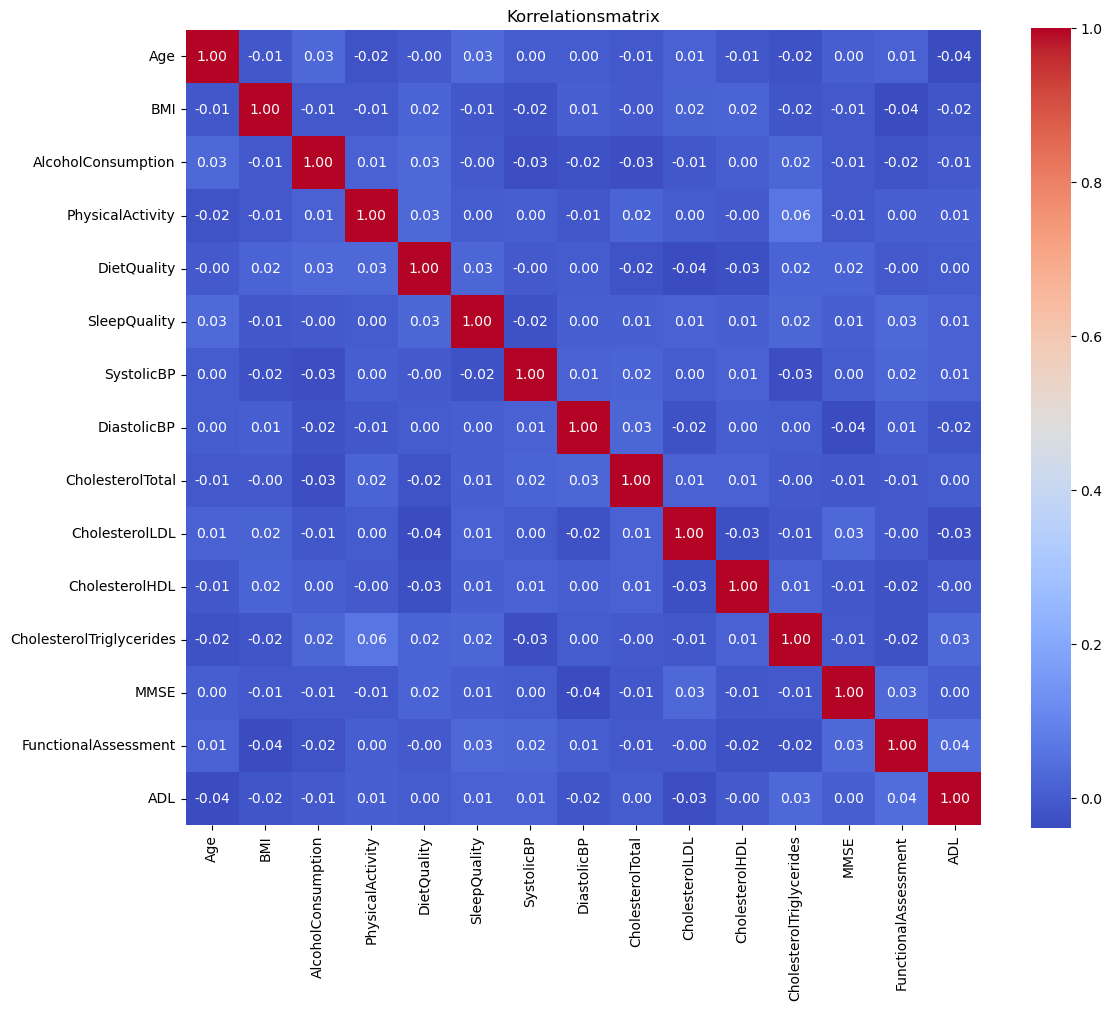

In [20]:
# correlation matrix
# only numerical
df_numeric = df[column_numerical] 

# Korrelationsmatrix berechnen
corr_matrix = df_numeric.corr()

# Heatmap plotten
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Korrelationsmatrix')
plt.tight_layout()
plt.show()

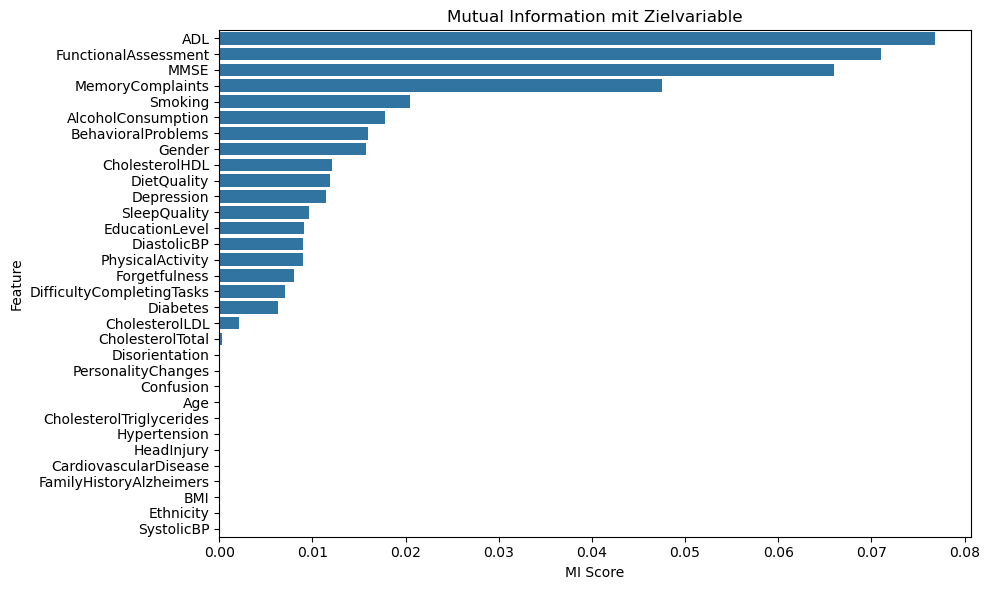

In [21]:
# Automatisch typisieren
numerical = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Wenn du weißt, dass 0/1-Variablen auch als numerisch gespeichert sind:
binary = [col for col in numerical if df[col].dropna().nunique() <= 2]
continuous = [col for col in numerical if col not in binary]


from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Zielvariable
y = df['Diagnosis']

# Alle Features (vorher Kategorisches codieren)
X = df.drop(columns=['Diagnosis']).copy()
for col in X.select_dtypes(include='object'):
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

X = X.fillna(0)

mi = mutual_info_classif(X, y, discrete_features='auto', random_state=0)

import pandas as pd
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi}).sort_values(by='MI Score', ascending=False)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=mi_df, x='MI Score', y='Feature')
plt.title('Mutual Information mit Zielvariable')
plt.tight_layout()
plt.show()

# very small correlations

In [22]:
from scipy.stats import chi2_contingency

for col in binary:
    ct = pd.crosstab(df[col], df['Diagnosis'])
    chi2, p, _, _ = chi2_contingency(ct)
    print(f"{col}: p-Wert = {p:.4f} {'(signifikant)' if p < 0.05 else ''}")

# significant: MemoryComplaints,BehavioralProblems


Gender: p-Wert = 0.4020 
Smoking: p-Wert = 0.5728 
FamilyHistoryAlzheimers: p-Wert = 0.1926 
CardiovascularDisease: p-Wert = 0.5875 
Diabetes: p-Wert = 0.4526 
Depression: p-Wert = 0.7065 
HeadInjury: p-Wert = 0.4179 
Hypertension: p-Wert = 0.1673 
MemoryComplaints: p-Wert = 0.0000 (signifikant)
BehavioralProblems: p-Wert = 0.0000 (signifikant)
Confusion: p-Wert = 0.4045 
Disorientation: p-Wert = 0.5125 
PersonalityChanges: p-Wert = 0.7370 
DifficultyCompletingTasks: p-Wert = 0.9264 
Forgetfulness: p-Wert = 1.0000 
Diagnosis: p-Wert = 0.0000 (signifikant)


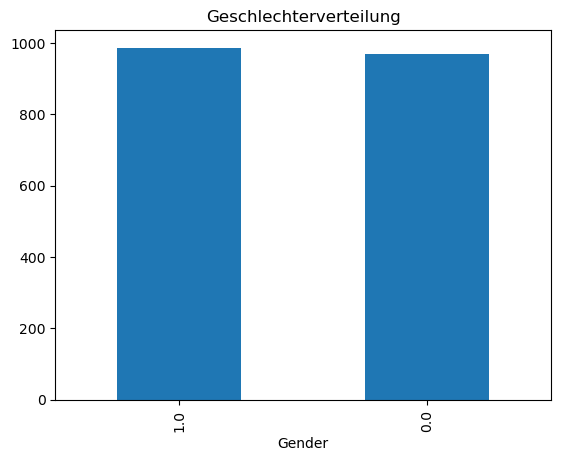

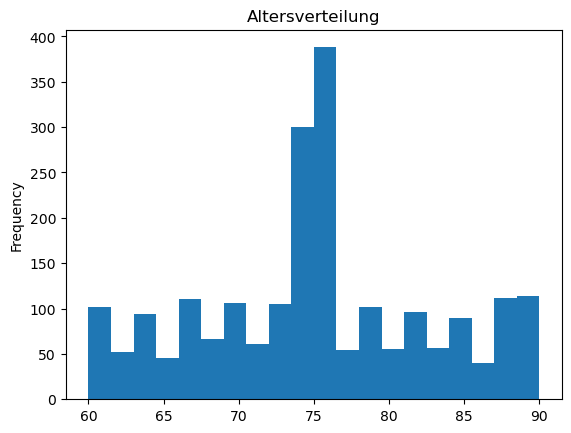

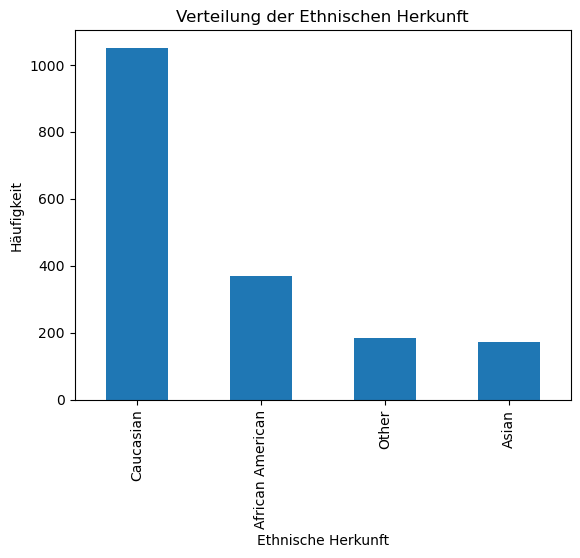

In [23]:
# further look into possible inbalances

# show gender distribution
df['Gender'].value_counts().plot(kind='bar', title="Geschlechterverteilung")
plt.show()

# show age distribution
df['Age'].plot(kind='hist', bins=20, title="Altersverteilung")
plt.show()


# Mapping numerical values to the ethnicity values
ethnicity_mapping = {
    0: 'Caucasian',
    1: 'African American',
    2: 'Asian',
    3: 'Other'
}

# Add column Ethnicity_Label
df['Ethnicity_Label'] = df['Ethnicity'].map(ethnicity_mapping)

# plot
df['Ethnicity_Label'].value_counts().plot(kind='bar', title="Verteilung der Ethnischen Herkunft")
plt.xlabel('Ethnische Herkunft')
plt.ylabel('Häufigkeit')
plt.show()

In [24]:
#During our exploratory data analysis (EDA), we gained several important insights that will directly influence our preprocessing strategy, model choice, and evaluation methods.

""""
Missing Data
We observed a total of 9,231 missing values in the dataset. Certain variables like CardiovascularDisease and Depression have over 30% missingness, which we considered too high for simple deletion. Instead, we used Multiple Imputation by Chained Equations (MICE) to handle missing data, as this method accounts for relationships between variables and preserves data integrity. We applied both scikit-learn's IterativeImputer and the more advanced miceforest package to impute missing values effectively.

Class Imbalance
Our target variable, Diagnosis, is imbalanced with 951 cases without Alzheimer’s and 531 with Alzheimer’s. This class imbalance poses a risk of bias in prediction models, especially if accuracy is used as the sole evaluation metric. To address this, we plan to:

Use models that support class weighting (e.g., logistic regression, random forest with class_weight='balanced')

Consider resampling techniques such as SMOTE

Focus on evaluation metrics that are more robust to imbalance, like F1-score, precision, recall, and ROC-AUC

Outliers
Our outlier analysis using IQR thresholds showed no significant outliers across the numerical variables. Therefore, we decided to keep all the data without removing or transforming any values, ensuring we maintain the original structure and distribution.

Feature Relevance
Using mutual information and Chi-square tests, we identified several features with strong associations to the target variable, including:

MemoryComplaints

BehavioralProblems

MMSE

FunctionalAssessment

These features will play a central role in our feature selection and model input decisions. Less informative features may be excluded or downweighted during modeling, especially with regularized models.

Demographic Bias
We noticed a predominance of Caucasian patients, which introduces potential ethnic bias in the data. Although gender is relatively balanced, we are aware that underrepresented ethnic groups may not be accurately captured by our model. We plan to:

Monitor performance across subgroups

Report and document any disparities

Consider fairness metrics if applicable

Data Types and Encoding
All categorical variables were correctly converted and encoded using label encoding for compatibility with machine learning models. For tree-based models, we may use one-hot encoding where appropriate.
"""



'"\nMissing Data\nWe observed a total of 9,231 missing values in the dataset. Certain variables like CardiovascularDisease and Depression have over 30% missingness, which we considered too high for simple deletion. Instead, we used Multiple Imputation by Chained Equations (MICE) to handle missing data, as this method accounts for relationships between variables and preserves data integrity. We applied both scikit-learn\'s IterativeImputer and the more advanced miceforest package to impute missing values effectively.\n\nClass Imbalance\nOur target variable, Diagnosis, is imbalanced with 951 cases without Alzheimer’s and 531 with Alzheimer’s. This class imbalance poses a risk of bias in prediction models, especially if accuracy is used as the sole evaluation metric. To address this, we plan to:\n\nUse models that support class weighting (e.g., logistic regression, random forest with class_weight=\'balanced\')\n\nConsider resampling techniques such as SMOTE\n\nFocus on evaluation metrics 

In [25]:
# 3. Data Preprocessing 21.05.24 Paula, Hannah, Lena, Katharina
# Handling outlires and missing values --> look at task two

# Encoding categorical variables
# variables such as gender, ethnicity, diabetis, smoking, education level etc. are label encoded
# Sleep quality 4-10 is ordinal encoded
# Educational level 0-3 ordinal
# Diet quality (0-10), functional assesment (0-10), ADL (0-10) also ordinal encoded

df_imputed2.head()


Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0  73.000000     0.0        0.0             2.0  27.758801      0.0   
1  89.000000     0.0        0.0             0.0  27.737316      0.0   
2  73.000000     0.0        3.0             1.0  17.795882      0.0   
3  74.943689     1.0        0.0             1.0  27.692523      1.0   
4  89.000000     1.0        0.0             0.0  20.716974      1.0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0           13.297218          6.327112     1.347214      9.025679  ...   
1            4.542524          7.619885     4.867441      7.151293  ...   
2           19.555085          7.844988     4.796983      9.673574  ...   
3           12.209266          8.428001     7.435604      8.392554  ...   
4           18.454356          6.310461     0.795498      5.597238  ...   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0              6.518877               0.0                 0.0  1.725883   
1              7.118696               0.0                 0.0  2.592424   
2              5.895077               0.0                 0.0  7.119548   
3              8.965106               0.0                 1.0  6.481226   
4              6.045039               0.0                 0.0  0.014691   

   Confusion  Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0        0.0             0.0                 0.0                        1.0   
1        0.0             0.0                 0.0                        0.0   
2        0.0             1.0                 0.0                        1.0   
3        0.0             0.0                 0.0                        0.0   
4        0.0             0.0                 1.0                        1.0   

   Forgetfulness  Diagnosis  
0            0.0          0  
1            1.0          0  
2            0.0          0  
3            0.0          0  
4            0.0          0  

[5 rows x 33 columns]

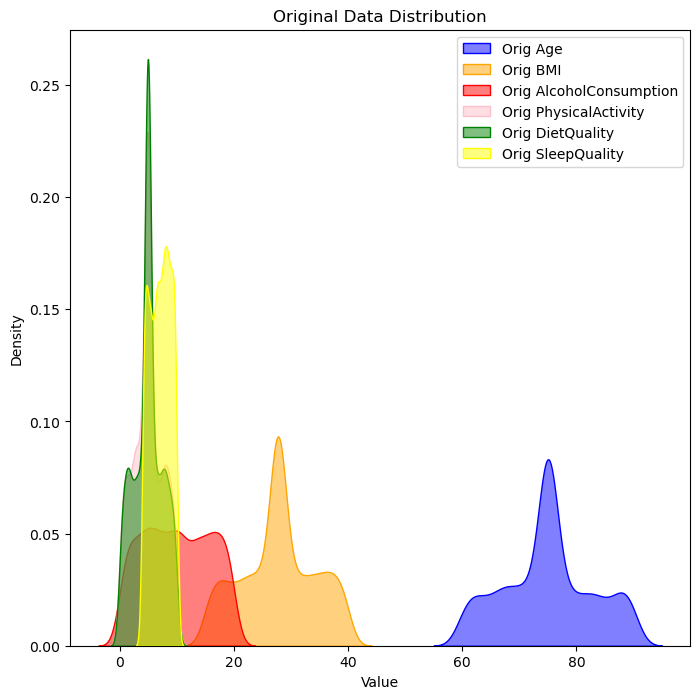

Age  Gender  Ethnicity  EducationLevel       BMI  Smoking  \
0 -0.257968     0.0        0.0             2.0  0.003835      0.0   
1  1.809536     0.0        0.0             0.0  0.000485      0.0   
2 -0.257968     0.0        3.0             1.0 -1.549693      0.0   
3 -0.006807     1.0        0.0             1.0 -0.006500      1.0   
4  1.809536     1.0        0.0             0.0 -1.094204      1.0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0            0.565923          0.559557    -1.445440      1.119918  ...   
1           -0.954895          1.070960    -0.024173      0.056836  ...   
2            1.653006          1.160008    -0.052620      1.487380  ...   
3            0.376930          1.390640     1.012705      0.760833  ...   
4            1.461793          0.552970    -1.668192     -0.824566  ...   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0              0.556103               0.0                 0.0 -1.170418   
1              0.787905               0.0                 0.0 -0.859000   
2              0.315035               0.0                 0.0  0.767960   
3              1.501454               0.0                 1.0  0.538560   
4              0.372988               0.0                 0.0 -1.785388   

   Confusion  Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0        0.0             0.0                 0.0                        1.0   
1        0.0             0.0                 0.0                        0.0   
2        0.0             1.0                 0.0                        1.0   
3        0.0             0.0                 0.0                        0.0   
4        0.0             0.0                 1.0                        1.0   

   Forgetfulness  Diagnosis  
0            0.0          0  
1            1.0          0  
2            0.0          0  
3            0.0          0  
4            0.0          0  

[5 rows x 33 columns]

In [26]:
# Scaling numerical features
# We chose the StandardScaler because our numerical features are approximately normally distributed and we did not detect significant outliers during the EDA. Standard scaling transforms the features to have a mean of 0 and a standard deviation of 1. This ensures that all features contribute equally to the model and are on a comparable scale.

#Import library
from sklearn.preprocessing import StandardScaler

# Select only the numerical columns
data_to_scale = df_imputed2[['Age', 'BMI', "AlcoholConsumption", "PhysicalActivity", "DietQuality", "SleepQuality", "SystolicBP", "DiastolicBP", "CholesterolTotal", "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides", "MMSE", "FunctionalAssessment", "ADL"]]

# Use standard scaler
Scaler = StandardScaler()

# Fit and transform the selected columns
scaled_df = Scaler.fit_transform(data_to_scale)
columnsnumerical = ['Age', 'BMI', "AlcoholConsumption", "PhysicalActivity", "DietQuality", "SleepQuality", "SystolicBP", "DiastolicBP", "CholesterolTotal", "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides", "MMSE", "FunctionalAssessment", "ADL"]
scaled_df = pd.DataFrame(scaled_df, columns= columnsnumerical)
scaled_df.head()

# Set up the matplotlib figure
import seaborn as sns
import matplotlib.pyplot as plt
# Set up the matplotlib figure for the original data
plt.figure(figsize=(8, 8))
# Plot original data line plots
sns.kdeplot(df['Age'], color='blue', label='Orig Age', fill=True, alpha=0.5)
sns.kdeplot(df['BMI'], color='orange', label='Orig BMI', fill=True, alpha=0.5)
sns.kdeplot(df['AlcoholConsumption'], color='red', label='Orig AlcoholConsumption', fill=True, alpha=0.5)
sns.kdeplot(df['PhysicalActivity'], color='pink', label='Orig PhysicalActivity', fill=True, alpha=0.5)
sns.kdeplot(df['DietQuality'], color='green', label='Orig DietQuality', fill=True, alpha=0.5)
sns.kdeplot(df['SleepQuality'], color='yellow', label='Orig SleepQuality', fill=True, alpha=0.5)

plt.title('Original Data Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()





# Ersetze die numerischen Spalten im Original mit den skalierten
df_final = df_imputed2.copy()
df_final[column_numerical] = scaled_df

df_final.head()

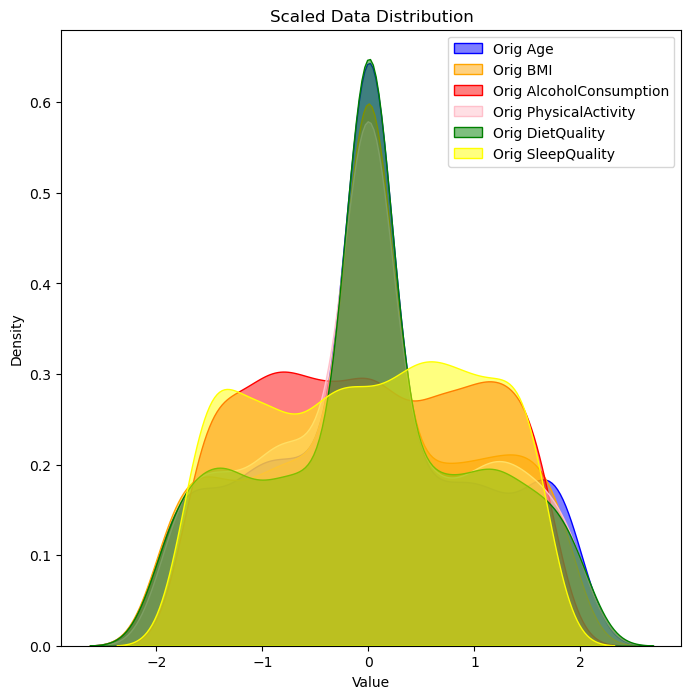

In [27]:
# Set up the matplotlib figure for the scaled data
plt.figure(figsize=(8, 8))
# Plot scaled data line plots
sns.kdeplot(scaled_df['Age'], color='blue', label='Orig Age', fill=True, alpha=0.5)
sns.kdeplot(scaled_df['BMI'], color='orange', label='Orig BMI', fill=True, alpha=0.5)
sns.kdeplot(scaled_df['AlcoholConsumption'], color='red', label='Orig AlcoholConsumption', fill=True, alpha=0.5)
sns.kdeplot(scaled_df['PhysicalActivity'], color='pink', label='Orig PhysicalActivity', fill=True, alpha=0.5)
sns.kdeplot(scaled_df['DietQuality'], color='green', label='Orig DietQuality', fill=True, alpha=0.5)
sns.kdeplot(scaled_df['SleepQuality'], color='yellow', label='Orig SleepQuality', fill=True, alpha=0.5)
plt.title('Scaled Data Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


# now we can see that after the scaling the density functions overlay and are centered
# you can clearly see the difference between the two graphs


In [28]:
# hier weiter machen mit min max scaler folie 34 


In [29]:
# We did not perform feature extraction because our dataset already contains well-defined, domain-specific features that are meaningful and interpretable on their own.
# feature selection

# filter method chi- squared

# Import libraries
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE',
       'FunctionalAssessment', 'ADL']
X = df_imputed2.loc[:, features]
y = df_imputed2.loc[:, ['Diagnosis']]
X.shape
y.shape


# Selecting features with high chi-square
chi2_selector = SelectKBest(chi2, k=5)
X_kbest = chi2_selector.fit_transform(X, y)

# Get indices of selected features
selected_feature_indices = chi2_selector.get_support(indices=True)
# Get names of selected features
selected_feature_names = [features[i] for i in selected_feature_indices]
print("Selected Features:", selected_feature_names)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])


# We applied the Chi-Squared feature selection method on 15 unscaled numerical and ordinal features to identify those most strongly associated with the 
# Alzheimer’s diagnosis (binary target variable). By setting k=5, we selected the top five features: CholesterolHDL, CholesterolTriglycerides, MMSE, 
# FunctionalAssessment, and ADL. These variables show the highest statistical dependence with the target and will be prioritized in our modeling pipeline.


# Falls noch weitere feature selection methods verwendet werden sollen/wir hier noch machen wollen muss man mit df_imputed2 weiter machen


Selected Features: ['CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']
Original number of features: 15
Reduced number of features: 5


In [30]:
# reduce data set to only important/interesting/selected features
# Weil Modelle werden schneller trainiert
# Weniger Gefahr von Overfitting
# Bessere Interpretierbarkeit

# Liste der ausgewählten Features
selected_features = ['CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

# Datensatz verkleinern
X = df_final[selected_features]
y = df_final['Diagnosis']

# Liste der gewünschten Spalten: 5 Features + Zielvariable
selected_columns = selected_features + ['Diagnosis']

# Neuer DataFrame nur mit diesen Spalten
df_mt = df_final[selected_columns]

# Vorschau
df_mt.head()


CholesterolHDL  CholesterolTriglycerides      MMSE  FunctionalAssessment  \
0       -1.171032                 -0.648199  0.791380              0.556103   
1        0.894292                  0.650721  0.691042              0.787905   
2        0.472710                 -1.418585 -0.873383              0.315035   
3        0.412826                  0.483468 -0.090419              1.501454   
4       -0.114741                  0.617060 -0.146298              0.372988   

        ADL  Diagnosis  
0 -1.170418          0  
1 -0.859000          0  
2  0.767960          0  
3  0.538560          0  
4 -1.785388          0

In [31]:
# Task 4 I 28.05.2025 I Lena Blecken, Katharina Schugg, Paula Venn, Hannah Bilmayer
# Model Selection
 
 
 
# To ensure diversity in algorithmic approaches, we selected three models from different families:
 
# 1. Random Forest Classifier (Tree-based Ensemble Method)
# Highly robust to non-linear relationships
# Handles both categorical and numerical features well
# Supports class_weight='balanced' to address class imbalance
# Provides interpretability through feature importance
# Does not require feature scaling (but scaling is not harmful)
 
# 2. Support Vector Machine (SVM with RBF Kernel) (Margin-based Method)
# Performs well on high-dimensional data
# The kernel trick allows modeling of complex, non-linear decision boundaries
# Can handle class imbalance using class_weight='balanced'
# While SVMs can be computationally intensive, our dataset (2,149 samples) is well within a manageable range
 
# 3. Logistic Regression
# Why it's suitable:
# Serves as a strong baseline with high interpretability
# Well-suited for explainable models, which is crucial in medical applications
# Handles class imbalance with class_weight='balanced'
# Outputs probabilistic predictions, useful for metrics like ROC-AUC and decision thresholds
# Efficient even with many input features; works well with standardized data

In [32]:
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [33]:
import numpy as np
from sklearn.model_selection import train_test_split

In [43]:
# X y schon oben definiert
#Sanity Check
print(X)
print(y)

# We applied a stratified random split to divide our dataset into training (80%) and test (20%) sets. This method was chosen due to the imbalanced distribution 
# of the target variable Diagnosis, where significantly more participants did not have Alzheimer’s. Stratified sampling ensures that both the training and test 
# sets maintain the original class proportions, allowing for more accurate and unbiased evaluation of the model’s performance. Since the dataset does not involve 
# time-based sequences, a temporal split was not applicable.

# Import
from sklearn.model_selection import StratifiedShuffleSplit
# Instantiate StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform stratified sampling
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]




#Print out the shape of the four sets
print("Size of X_train:", X_train.shape)
print("Size of y_train:", y_train.shape)
print("Size of X_test:", X_test.shape)
print("Size of y_test:", y_test.shape)


      CholesterolHDL  CholesterolTriglycerides      MMSE  \
0          -1.171032                 -0.648199  0.791380   
1           0.894292                  0.650721  0.691042   
2           0.472710                 -1.418585 -0.873383   
3           0.412826                  0.483468 -0.090419   
4          -0.114741                  0.617060 -0.146298   
...              ...                       ...       ...   
2144        0.070576                  0.061185 -1.599725   
2145        1.560231                  1.370158 -0.979376   
2146        1.834804                  0.652402  0.265948   
2147        0.996890                 -0.814293 -1.265847   
2148        1.025991                 -0.106751 -0.429849   

      FunctionalAssessment       ADL  
0                 0.556103 -1.170418  
1                 0.787905 -0.859000  
2                 0.315035  0.767960  
3                 1.501454  0.538560  
4                 0.372988 -1.785388  
...                    ...       ...  
2144  